In [88]:
import pandas as pd
from matplotlib import transforms, pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

%matplotlib inline



In [89]:
def error_rate(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

In [90]:
df = pd.read_csv('/Users/MayraBerrones/Documents/VisualCode/Spam.txt')
df.head()

,test,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Homework 9: 

Read through the spam example used throughout Chapter 9 and make an effort to replicate the steps for your own data. When something isn't quite applicable, discuss the reasons behind this. Be sure to read Sections 9.6 and 9.7 before getting started.

In the book's example, they use the dataset of spam and use the method of additive logistic regresion. At the start of the example, they mention ed thatthis type of model is widely used in medical research for binary data. In this case, the spam data set has the information of 4,601 messages and the values that it can take are email or spam. 

The data set has 52 predictors. Since it is a linear model and in the example they mention chapter 3 of this book to look for smoothing procedures that can accept observation weights, we are going to first try this example in the dataset of breast cancer from kaggle.



In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', color_codes=True)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.manifold import TSNE

from logitboost import LogitBoost

In [92]:
data = load_breast_cancer()
X = data.data
y = data.target_names[data.target]
n_classes = data.target.size

# Shuffle data and split it into training/testing samples
test_size = 1 / 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    shuffle=True, stratify=y,
                                                    random_state=0)

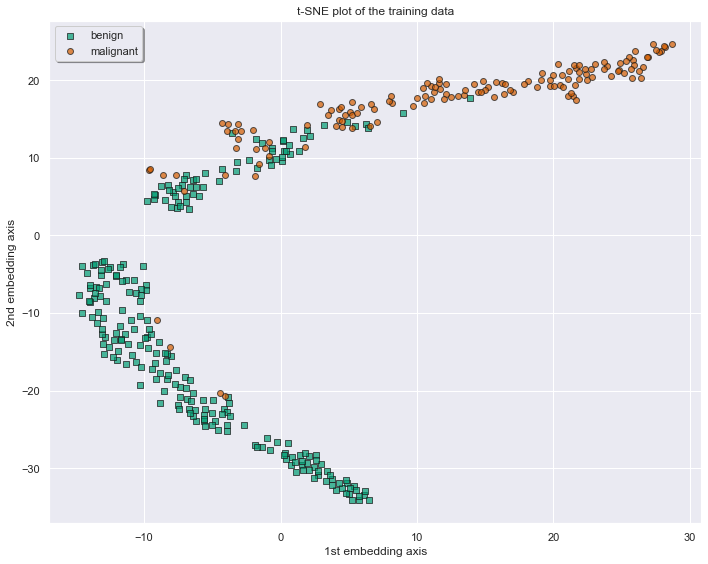

In [93]:
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 8))
mask_benign = (y_train == 'benign')
mask_malignant = (y_train == 'malignant')

plt.scatter(X_train_tsne[mask_benign, 0], X_train_tsne[mask_benign, 1],
           marker='s', c='g', label='benign', edgecolor='k', alpha=0.7)
plt.scatter(X_train_tsne[mask_malignant, 0], X_train_tsne[mask_malignant, 1],
           marker='o', c='r', label='malignant', edgecolor='k', alpha=0.7)


plt.title('t-SNE plot of the training data')
plt.xlabel('1st embedding axis')
plt.ylabel('2nd embedding axis')
plt.legend(loc='best', frameon=True, shadow=True)

plt.tight_layout()
plt.show()
plt.close()

In [94]:
lboost = LogitBoost(n_estimators=200, random_state=0)
lboost.fit(X_train, y_train)

LogitBoost(n_estimators=200, random_state=0)

In [95]:
y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Training accuracy: %.4f' % accuracy_train)
print('Test accuracy:     %.4f' % accuracy_test)

Training accuracy: 0.9947
Test accuracy:     0.9737


In [96]:
report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print('Training\n%s' % report_train)
print('Testing\n%s' % report_test)

Training
              precision    recall  f1-score   support

      benign       0.99      1.00      1.00       238
   malignant       1.00      0.99      0.99       141

    accuracy                           0.99       379
   macro avg       1.00      0.99      0.99       379
weighted avg       0.99      0.99      0.99       379

Testing
              precision    recall  f1-score   support

      benign       0.97      0.98      0.98       119
   malignant       0.97      0.96      0.96        71

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190



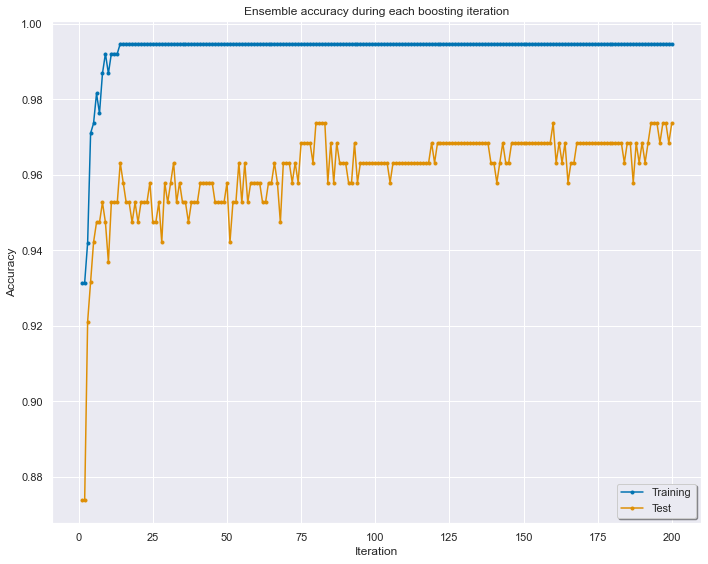

In [97]:
iterations = np.arange(1, lboost.n_estimators + 1)
staged_accuracy_train = list(lboost.staged_score(X_train, y_train))
staged_accuracy_test = list(lboost.staged_score(X_test, y_test))

plt.figure(figsize=(10, 8))
plt.plot(iterations, staged_accuracy_train, label='Training', marker='.')
plt.plot(iterations, staged_accuracy_test, label='Test', marker='.')

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Ensemble accuracy during each boosting iteration')
plt.legend(loc='best', shadow=True, frameon=True)

plt.tight_layout()
plt.show()
plt.close()

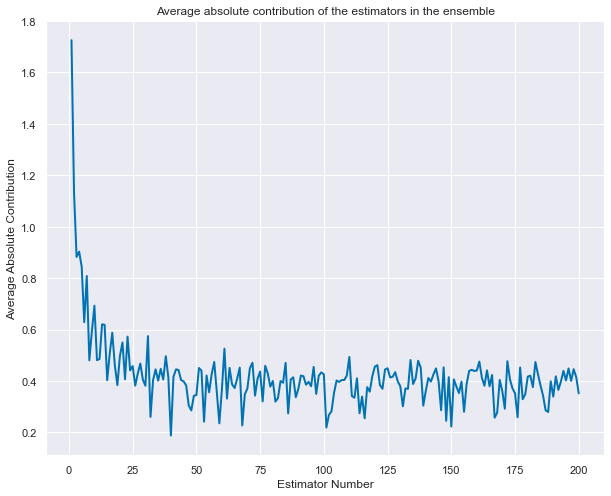

In [98]:
contrib_train = lboost.contributions(X_train)

plt.figure(figsize=(10, 8))
plt.plot(iterations, contrib_train, lw=2)
plt.xlabel('Estimator Number')
plt.ylabel('Average Absolute Contribution')
plt.title('Average absolute contribution of the estimators in the ensemble')
plt.show()
plt.close()

In [99]:
from pygam import LogisticGAM, s, f

df = pd.DataFrame(data.data, columns=data.feature_names)[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
target_df = pd.Series(data.target)
df.describe()




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400


In [100]:
X = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
y = target_df
#Fit a model with the default parameters
gam = LogisticGAM().fit(X, y)

In [101]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     19.4476
Link Function:                        LogitLink Log Likelihood:                                   -54.0256
Number of Samples:                          569 AIC:                                              146.9464
                                                AICc:                                             148.5483
                                                UBRE:                                               2.2856
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8562
Feature Function                  Lam

C:\Users\MayraBerrones\anaconda3\envs\vs1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [102]:
gam.accuracy(X, y)

0.9560632688927944

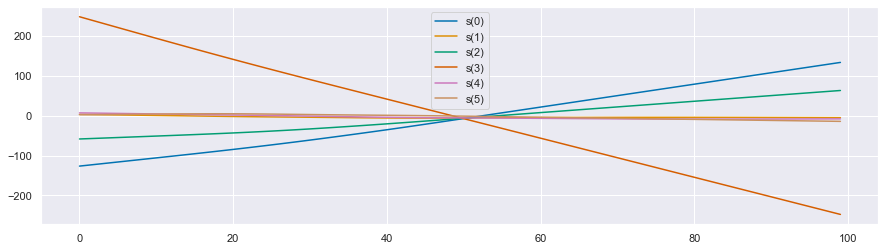

In [103]:
plt.figure(figsize=(15, 4))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.plot(gam.partial_dependence(term=i), label="s({})".format(i))
    plt.legend()
    plt.savefig('/Users/MayraBerrones/Documents/VisualCode/accuracy_LogisticGAM1.png')

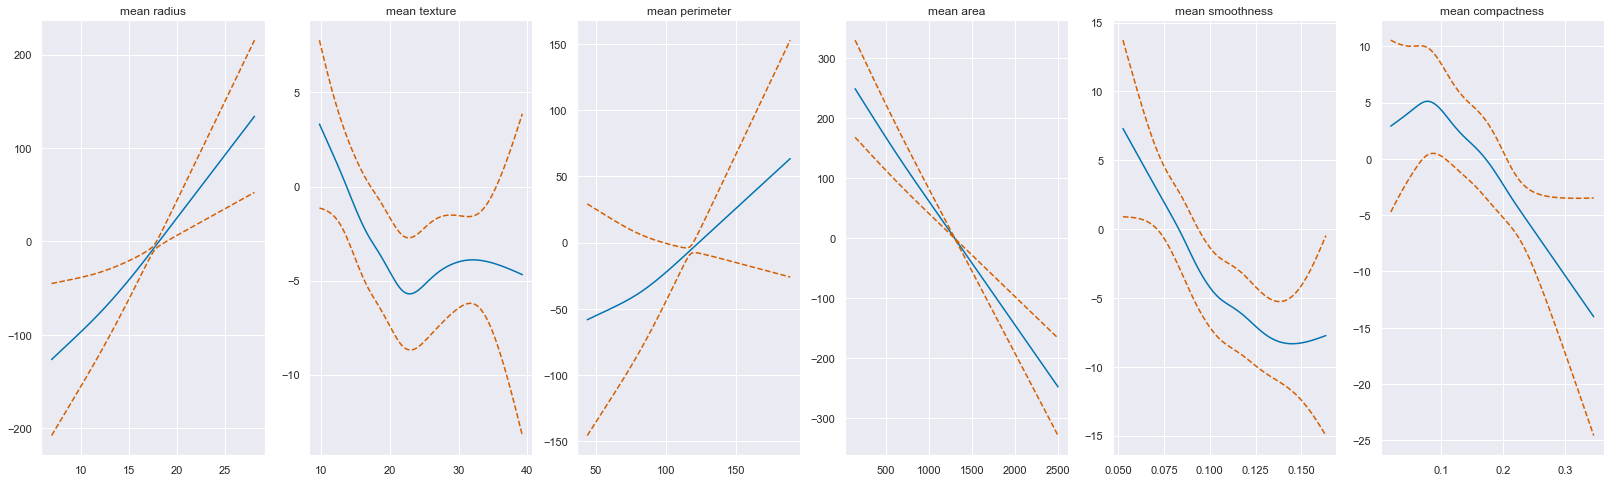

In [104]:

plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(data.feature_names[0:6]))
titles = data.feature_names
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])

plt.savefig('/Users/MayraBerrones/Documents/VisualCode/LogisticGAM-separated.png')
plt.show()

In [105]:
lambda_ = 0.6
n_splines = [25, 6, 25, 25, 6, 4] 
constraints = None
gam = LogisticGAM(constraints=constraints, 
          lam=lambda_,
         n_splines=n_splines).fit(X, y)

In [106]:
gam.accuracy(X, y)

0.9507908611599297

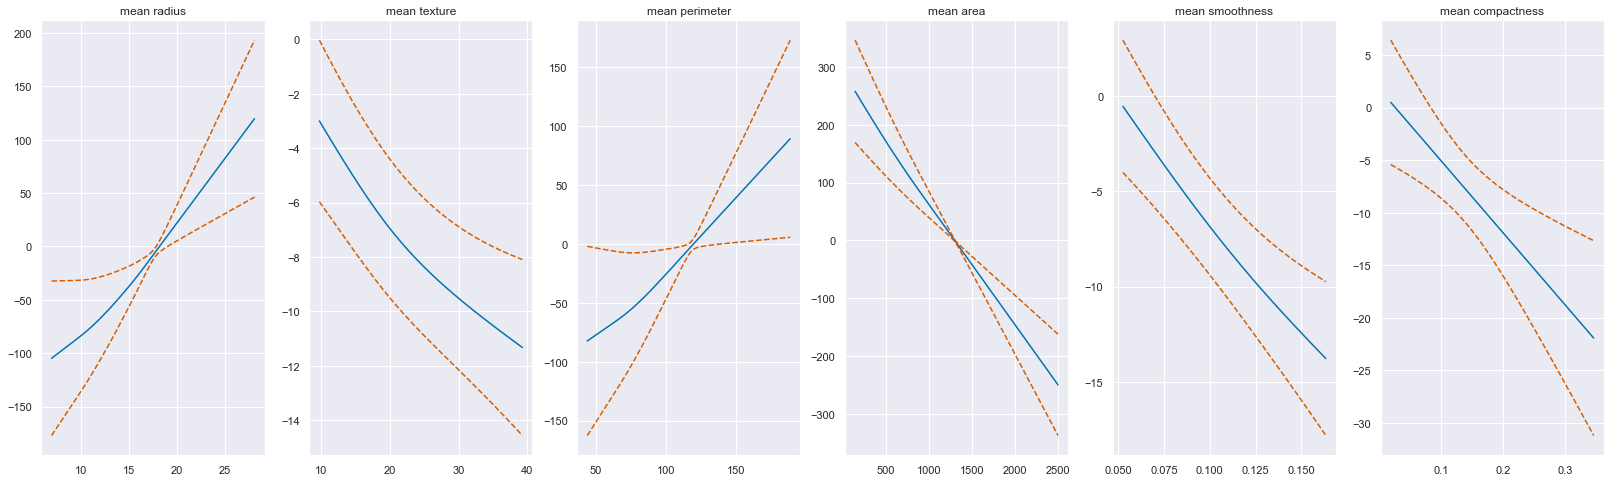

In [107]:
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(data.feature_names[0:6]))
titles = data.feature_names
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])

plt.savefig('/Users/MayraBerrones/Documents/VisualCode/LogisticGAM-sep-smooth.png')
plt.show()

In [108]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
clf_en.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=0)

In [109]:
y_pred_en = clf_en.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8737


In [111]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['benign', 'malignant', 'benign', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'malignant', 'malignant',
       'benign', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'malignant', 'benign',
       'benign', 'malignant', 'malignant', 'malignant', 'malignant',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'benign', 'malignant', 'malignant', 'malignant',
       'benign', 'malignant', 'malignant', 'malignant', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'malignant', 'malignant',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign', 

In [112]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8737


In [113]:
plt.figure(figsize=(12,8))
from sklearn import tree
#fig = plt.figure(figsize=(25,20))

import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_en.fit(X_train, y_train), out_file=None, 
                                feature_names=data.feature_names,  
                                class_names=data.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
graph.format = 'png'
graph.view(filename='Tree_cancer', directory= '/Users/MayraBerrones/Documents/VisualCode')
#tree.plot_tree(clf_en.fit(X_train, y_train))

'/Users/MayraBerrones/Documents/VisualCode\\Tree_cancer.png'

<Figure size 864x576 with 0 Axes>

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[101  18]
 [  6  65]]


In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

      benign       0.94      0.85      0.89       119
   malignant       0.78      0.92      0.84        71

    accuracy                           0.87       190
   macro avg       0.86      0.88      0.87       190
weighted avg       0.88      0.87      0.88       190

